
Model Performance for X Coordinate:
Linear Regression:
  MSE: 5920701219309515.0
  R2: -0.0009985844444262426
  CV R2: -0.0010595892709995836
Ridge Regression:
  MSE: 5920700431534224.0
  R2: -0.0009984512571699078
  CV R2: -0.0010594729202630716
Lasso Regression:
  MSE: 5920701206481929.0
  R2: -0.0009985822756974905
  CV R2: -0.0010595891241667488
Polynomial Regression (Degree 2):
  MSE: 5909900364630688.0
  R2: 0.0008274898403283215
  CV R2: -0.001542312301614146
Random Forest:
  MSE: 2095718037790.0398
  R2: 0.9996456820380699
  CV R2: 0.9993560998248135
XGBoost:
  MSE: 65676310901807.695
  R2: 0.9888962655251318
  CV R2: 0.9868616640663801


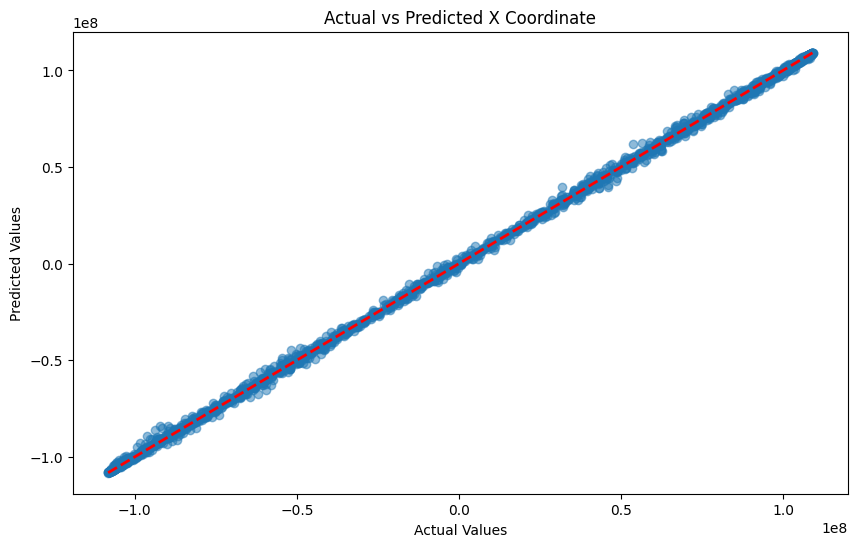


Model Performance for Y Coordinate:
Linear Regression:
  MSE: 5769147765942756.0
  R2: -0.00013710897527041688
  CV R2: -0.0009038536347733661
Ridge Regression:
  MSE: 5769147708974619.0
  R2: -0.00013709909929748854
  CV R2: -0.0009037973720432913
Lasso Regression:
  MSE: 5769147766555505.0
  R2: -0.00013710908149633383
  CV R2: -0.0009038533304509766
Polynomial Regression (Degree 2):
  MSE: 5772092554329613.0
  R2: -0.000647616291647779
  CV R2: -0.0013902404545952374
Random Forest:
  MSE: 1978005795924.6577
  R2: 0.999657093720159
  CV R2: 0.9993506918794752
XGBoost:
  MSE: 65089937418148.73
  R2: 0.9887160349372451
  CV R2: 0.9870093749940922


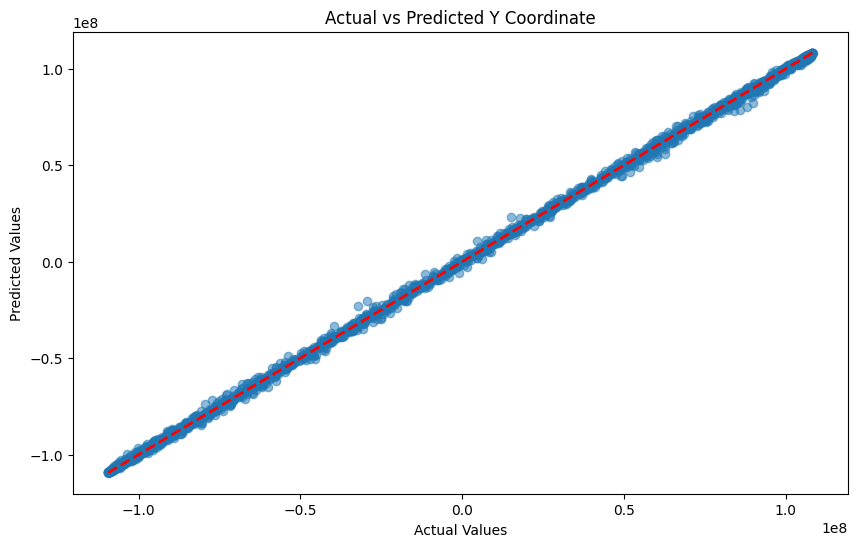


Model Performance for Z Coordinate:
Linear Regression:
  MSE: 20678485903364.242
  R2: -0.0005457030111455374
  CV R2: -0.0014375214861542807
Ridge Regression:
  MSE: 20678484158372.258
  R2: -0.0005456185782601874
  CV R2: -0.001437391803057908
Lasso Regression:
  MSE: 20678485996418.43
  R2: -0.0005457075136496847
  CV R2: -0.0014375162129107056
Polynomial Regression (Degree 2):
  MSE: 20646581171259.176
  R2: 0.0009980339318118592
  CV R2: -0.0017692625161155108
Random Forest:
  MSE: 6494868757.662809
  R2: 0.9996857403845973
  CV R2: 0.9993862711542487
XGBoost:
  MSE: 210460339052.82993
  R2: 0.9898167018186125
  CV R2: 0.9868984792490656


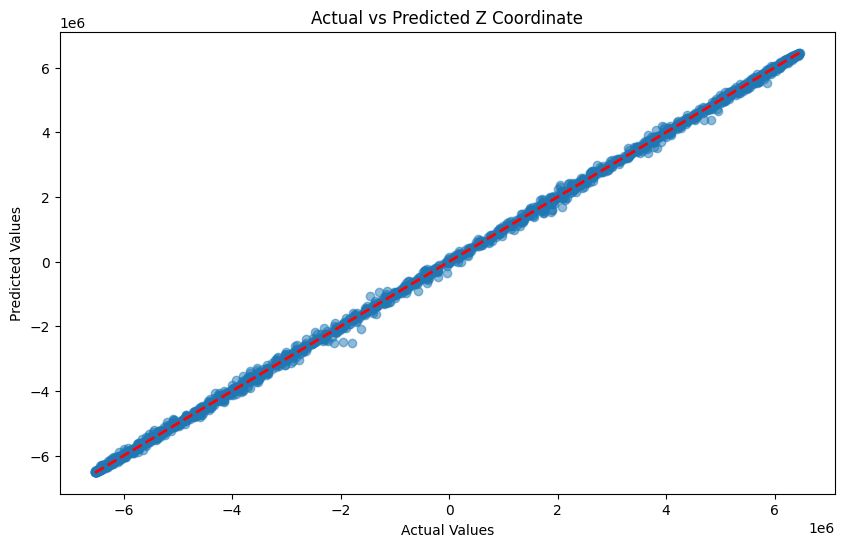

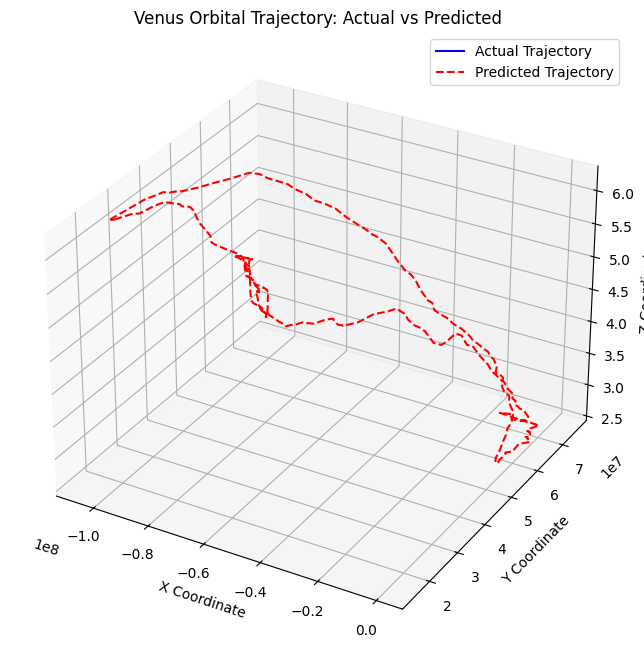

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

class VenusOrbitalAnalysis:
    def __init__(self, data_path):
        """
        Initialize the analysis with orbital data
        
        Parameters:
        -----------
        data_path : str
            Path to the CSV file containing Venus orbital data
        """
        # Load the data
        self.data = pd.read_csv(data_path)
        
        # Convert date column to datetime
        self.data['date'] = pd.to_datetime(self.data['Date'])
        
        # Calculate days since first observation
        self.data['days'] = (self.data['date'] - self.data['date'].min()).dt.days
        
        # Add trigonometric features
        self.data['sin_yearly'] = np.sin(2 * np.pi * self.data['days'] / 365)
        self.data['cos_yearly'] = np.cos(2 * np.pi * self.data['days'] / 365)

    def prepare_data(self, features, target):
        """
        Prepare data for machine learning models
        
        Parameters:
        -----------
        features : list
            List of feature column names
        target : str
            Target column name
        
        Returns:
        --------
        X_train, X_test, y_train, y_test : numpy arrays
        """
        X = self.data[features]
        y = self.data[target]
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        return X_train, X_test, y_train, y_test

    def create_models(self):
        """
        Create a dictionary of regression models
        
        Returns:
        --------
        dict of regression models
        """
        models = {
            'Linear Regression': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'Ridge Regression': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=1.0))
            ]),
            'Lasso Regression': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', Lasso(alpha=1.0))
            ]),
            'Polynomial Regression (Degree 2)': Pipeline([
                ('poly', PolynomialFeatures(degree=2)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
        }
        return models

    def evaluate_models(self, X_train, X_test, y_train, y_test):
        """
        Evaluate multiple regression models
        
        Parameters:
        -----------
        X_train, X_test, y_train, y_test : numpy arrays
        
        Returns:
        --------
        dict of model performance metrics
        """
        models = self.create_models()
        results = {}
        
        for name, model in models.items():
            # Fit the model
            model.fit(X_train, y_train)
            
            # Predict
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Cross-validation R2
            cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
            
            results[name] = {
                'MSE': mse,
                'R2': r2,
                'CV R2': cv_r2
            }
        
        return results

    def plot_actual_vs_predicted(self, X_train, X_test, y_train, y_test, coordinate):
        """
        Plot actual vs predicted values for the best model
        
        Parameters:
        -----------
        X_train, X_test, y_train, y_test : numpy arrays
        coordinate : str
            'x', 'y', or 'z'
        """
        models = self.create_models()
        best_model = max(
            models.values(), 
            key=lambda model: r2_score(y_test, model.fit(X_train, y_train).predict(X_test))
        )
        
        y_pred = best_model.predict(X_test)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.title(f'Actual vs Predicted {coordinate.upper()} Coordinate')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()

    def predict_future(self, future_data_path):
        """
        Predict future orbital positions
        
        Parameters:
        -----------
        future_data_path : str
            Path to future data for prediction
        
        Returns:
        --------
        DataFrame with predictions
        """
        # Load future data
        future_data = pd.read_csv(future_data_path)
        future_data['date'] = pd.to_datetime(future_data['Date'])
        future_data['days'] = (future_data['date'] - self.data['date'].min()).dt.days
        
        # Add trigonometric features
        future_data['sin_yearly'] = np.sin(2 * np.pi * future_data['days'] / 365)
        future_data['cos_yearly'] = np.cos(2 * np.pi * future_data['days'] / 365)
        
        # Prediction for each coordinate
        predictions = {}
        coordinates = ['x', 'y', 'z']
        
        for coord in coordinates:
            # Prepare features
            features = ['days', 'sin_yearly', 'cos_yearly']
            X_train, X_test, y_train, y_test = self.prepare_data(features, f'Position_{coord}')
            
            # Find best model
            models = self.create_models()
            best_model = max(
                models.values(), 
                key=lambda model: r2_score(y_test, model.fit(X_train, y_train).predict(X_test))
            )
            
            # Fit on full dataset
            best_model.fit(X_train, y_train)
            
            # Predict future positions
            predictions[coord] = best_model.predict(
                future_data[features]
            )
        
        # Combine predictions
        future_data[['predicted_x', 'predicted_y', 'predicted_z']] = pd.DataFrame(predictions)
        
        return future_data

    def plot_3d_trajectory(self, actual_data, predicted_data):
        """
        Create 3D plot of actual and predicted trajectories
        
        Parameters:
        -----------
        actual_data : DataFrame
            Actual orbital data
        predicted_data : DataFrame
            Predicted orbital data
        """
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot actual trajectory
        ax.plot(
            actual_data['Position_x'], 
            actual_data['Position_y'], 
            actual_data['Position_z'], 
            label='Actual Trajectory', 
            color='blue'
        )
        
        # Plot predicted trajectory
        ax.plot(
            predicted_data['predicted_x'], 
            predicted_data['predicted_y'], 
            predicted_data['predicted_z'], 
            label='Predicted Trajectory', 
            color='red', 
            linestyle='--'
        )
        
        ax.set_title('Venus Orbital Trajectory: Actual vs Predicted')
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.set_zlabel('Z Coordinate')
        ax.legend()
        plt.show()

# Example usage
if __name__ == '__main__':
    # Initialize the analysis
    analysis = VenusOrbitalAnalysis('RawData/horizons_results_30_years.csv')
    
    # Prepare features (example)
    features = ['days', 'sin_yearly', 'cos_yearly']
    
    # Evaluate models for each coordinate
    coordinates = ['x', 'y', 'z']
    for coord in coordinates:
        print(f"\nModel Performance for {coord.upper()} Coordinate:")
        X_train, X_test, y_train, y_test = analysis.prepare_data(
            features, f'Position_{coord}'
        )
        results = analysis.evaluate_models(X_train, X_test, y_train, y_test)
        
        # Print results
        for model, metrics in results.items():
            print(f"{model}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value}")
        
        # Plot actual vs predicted
        analysis.plot_actual_vs_predicted(X_train, X_test, y_train, y_test, coord)
    
    # Predict future positions
    future_predictions = analysis.predict_future('RawData/horizons_results_target.csv')
    
    # 3D trajectory plot
    analysis.plot_3d_trajectory(
        analysis.data[analysis.data['date'] >= '2022-09-30'], 
        future_predictions
    )

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

data_path = 'RawData/horizons_results_30_years.csv'
# Load the data
data = pd.read_csv(data_path)

# Convert date and calculate days since reference
date = pd.to_datetime(data['Date'].values)
reference_date = date.min()
days_since_reference = (date - reference_date).days
data['days_since_reference'] = days_since_reference

# Prepare feature and target variables
X = data['days_since_reference'].values.reshape(-1, 1)
Y_x = data['Position_x'].values.astype('float')
Y_y = data['Position_y'].values.astype('float')
Y_z = data['Position_z'].values.astype('float')

# Split data for each coordinate
X_train, X_test, Yx_train, Yx_test = train_test_split(X, Y_x, test_size=0.2, random_state=42)
_, _, Yy_train, Yy_test = train_test_split(X, Y_y, test_size=0.2, random_state=42)
_, _, Yz_train, Yz_test = train_test_split(X, Y_z, test_size=0.2, random_state=42)

# Polynomial regression degrees to test
degrees = [1, 2, 3, 4]

# Store results
results = {
    'x': {},
    'y': {},
    'z': {}
}

# Coordinate-wise regression analysis
coordinates = [
    ('x', X_train, X_test, Yx_train, Yx_test),
    ('y', X_train, X_test, Yy_train, Yy_test),
    ('z', X_train, X_test, Yz_train, Yz_test)
]

# plt.figure(figsize=(15, 5))

for coord, x_train, x_test, y_train, y_test in coordinates:
    print(f"\nAnalysis for {coord.upper()} Coordinate:")
    
    # Store coordinate-specific results
    coord_results = {}
    
    # Test different polynomial degrees
    for degree in degrees:
        # Create polynomial regression pipeline
        poly_reg = make_pipeline(
            PolynomialFeatures(degree),
            LinearRegression()
        )
        
        # Fit the model
        poly_reg.fit(x_train, y_train)
        
        # Predict
        y_pred = poly_reg.predict(x_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        coord_results[f'Polynomial Degree {degree}'] = {
            'RMSE': rmse,
            'R2': r2
        }
        
        # Print results
        print(f"Polynomial Degree {degree}:")
        print(f"  RMSE: {rmse}")
        print(f"  R2: {r2}")
    
    # Store coordinate results
    results[coord] = coord_results
    
    # Visualization subplot
    # plt.subplot(1, 3, {'x': 1, 'y': 2, 'z': 3}[coord])
    
    # Best degree based on lowest RMSE
    best_degree = min(
        coord_results, 
        key=lambda k: coord_results[k]['RMSE']
    )
    
    # Fit best model
    best_model = make_pipeline(
        PolynomialFeatures(int(best_degree.split()[-1])),
        LinearRegression()
    )
    best_model.fit(x_train, y_train)
    
    # Plotting
#     plt.scatter(x_test, y_test, color='blue', label='Actual', alpha=0.5)
    
#     # Sort for smooth line plot
#     x_plot = np.linspace(x_test.min(), x_test.max(), 200).reshape(-1, 1)
#     y_plot = best_model.predict(x_plot)
    
#     plt.plot(x_plot, y_plot, color='red', label=f'Best Fit (Degree {best_degree.split()[-1]})')
#     plt.title(f'{coord.upper()} Coordinate Regression')
#     plt.xlabel('Days since Reference')
#     plt.ylabel(f'Position {coord.upper()}')
#     plt.legend()

# plt.tight_layout()
# plt.show()

regression_results = results


Analysis for X Coordinate:
Polynomial Degree 1:
  RMSE: 76922422.07730311
  R2: -0.00038280634973220096
Polynomial Degree 2:
  RMSE: 76912645.70820361
  R2: -0.00012853744359508923
Polynomial Degree 3:
  RMSE: 76905406.90125616
  R2: 5.9712398714384385e-05
Polynomial Degree 4:
  RMSE: 76889519.56137615
  R2: 0.0004728107989623309

Analysis for Y Coordinate:
Polynomial Degree 1:
  RMSE: 75962384.33944452
  R2: -0.0003340573638415112
Polynomial Degree 2:
  RMSE: 75981787.07494992
  R2: -0.0008451444263679608
Polynomial Degree 3:
  RMSE: 75956136.58755767
  R2: -0.000169513240314334
Polynomial Degree 4:
  RMSE: 75970396.89429224
  R2: -0.000545100087050665

Analysis for Z Coordinate:
Polynomial Degree 1:
  RMSE: 4546245.623255358
  R2: -5.5233446006885956e-05
Polynomial Degree 2:
  RMSE: 4545751.312148991
  R2: 0.00016222578310065572
Polynomial Degree 3:
  RMSE: 4544823.018616731
  R2: 0.0005705403198075221
Polynomial Degree 4:
  RMSE: 4544063.661286421
  R2: 0.0009044854182267414


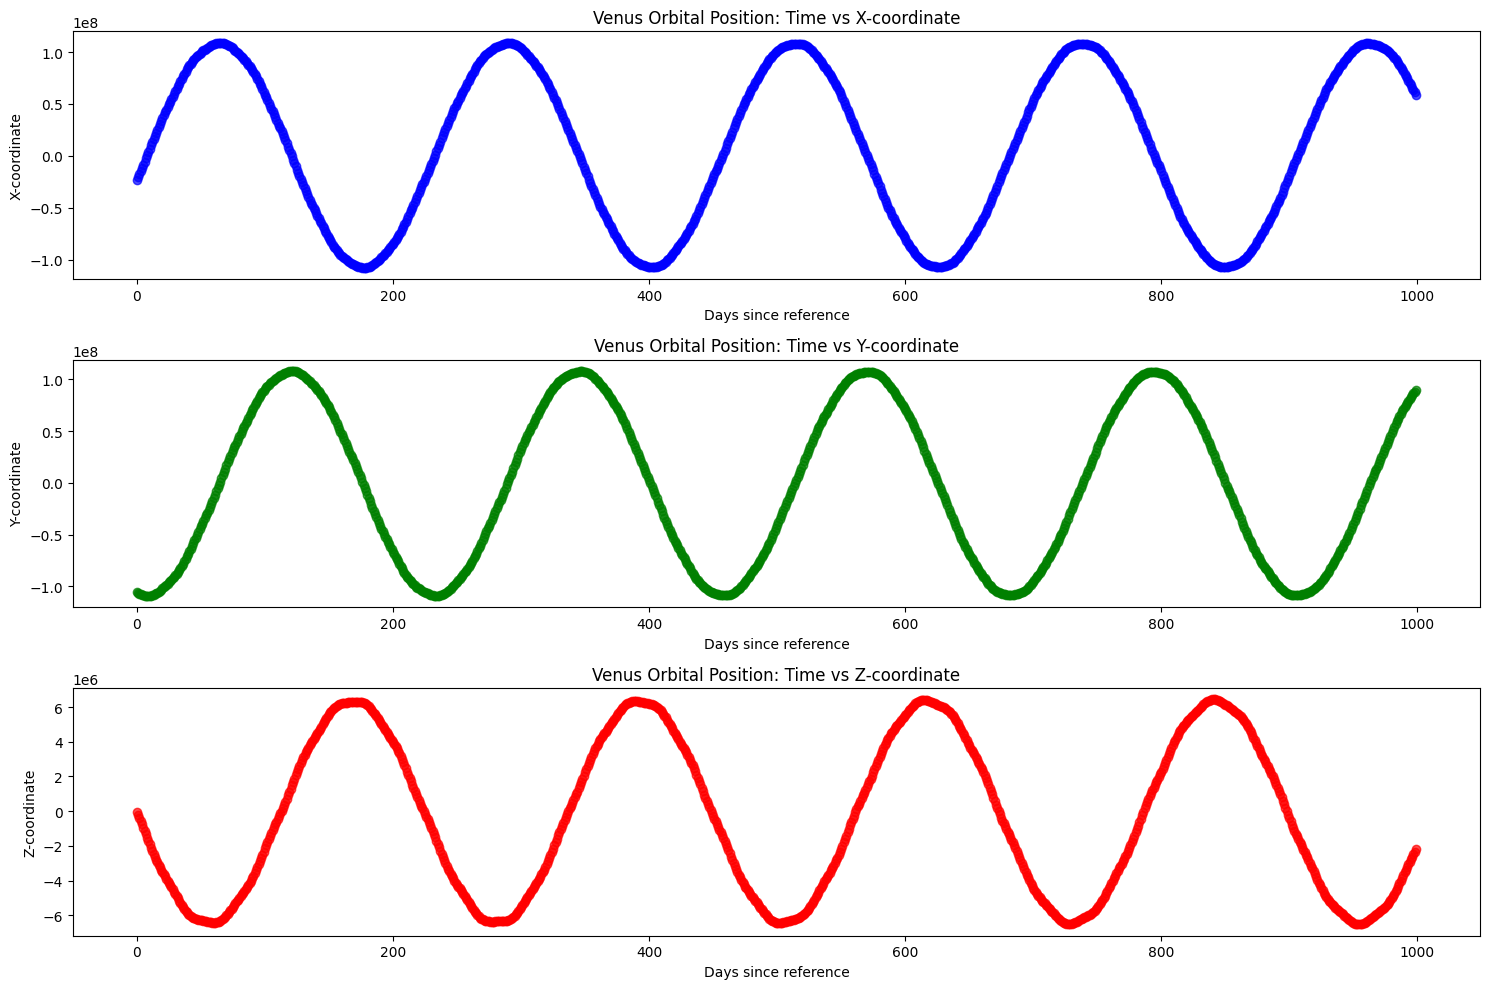

In [ ]:
plt.figure(figsize=(15, 10))

# X-coordinate subplot
plt.subplot(3, 1, 1)
plt.scatter(X[0:1000], Y_x[0:1000], alpha=0.7, color='blue')
plt.xlabel('Days since reference')
plt.ylabel('X-coordinate')
plt.title('Venus Orbital Position: Time vs X-coordinate')

# Y-coordinate subplot
plt.subplot(3, 1, 2)
plt.scatter(X[0:1000], Y_y[0:1000], alpha=0.7, color='green')
plt.xlabel('Days since reference')
plt.ylabel('Y-coordinate')
plt.title('Venus Orbital Position: Time vs Y-coordinate')

# Z-coordinate subplot
plt.subplot(3, 1, 3)
plt.scatter(X[0:1000], Y_z[0:1000], alpha=0.7, color='red')
plt.xlabel('Days since reference')
plt.ylabel('Z-coordinate')
plt.title('Venus Orbital Position: Time vs Z-coordinate')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import os


def create_periodic_features(days, periods=[365, 182.5, 91.25]):
    periodic_features = []
    
    for period in periods:
        # Sine and cosine periodic features for each period
        periodic_features.extend([
            np.sin(2 * np.pi * days / period),
            np.cos(2 * np.pi * days / period)
        ])
    
    return np.column_stack(periodic_features)

def advanced_periodic_polynomial_regression(data_path):
  # Load data
    data = pd.read_csv(data_path)
    date = pd.to_datetime(data['Date'].values)
    reference_date = date.min()
    days_since_reference = (date - reference_date).days.values
    
    # Prepare target variables
    Y_x = data['Position_x'].values.astype('float')
    Y_y = data['Position_y'].values.astype('float')
    Y_z = data['Position_z'].values.astype('float')
    
    # Create periodic features
    X_periodic = create_periodic_features(days_since_reference)
    
    # Combine reference days and periodic features
    X = np.column_stack([days_since_reference.reshape(-1, 1), X_periodic])
    
    # Regression models to test
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0)
    }
    
    # Polynomial degrees to test
    degrees = [1, 2, 3, 4]
    
    # Results storage
    results = {}
    
    # Coordinates to analyze
    coordinates = [
        ('x', Y_x),
        ('y', Y_y),
        ('z', Y_z)
    ]
    
    # plt.figure(figsize=(20, 15))
    
    for coord_idx, (coord_name, Y) in enumerate(coordinates, 1):
        coord_results = {}
        
        for model_name, base_model in models.items():
            model_results = {}
            
            for degree in degrees:
                # Create polynomial pipeline
                pipeline = make_pipeline(
                    PolynomialFeatures(degree),
                    StandardScaler(),
                    base_model
                )
                
                # Split data
                X_train, X_test, y_train, y_test = train_test_split(
                    X, Y, test_size=0.2, random_state=42
                )
                
                # Fit and predict
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
                
                # Calculate Metrics
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                r2 = r2_score(y_test, y_pred)
                
                # Cross-validation R2 score
                cv_r2 = cross_val_score(
                    pipeline, X, Y, cv=5, scoring='r2'
                ).mean()
                
                # Store results
                model_results[degree] = {
                    'RMSE': rmse,
                    'R2': r2,
                    'CV R2': cv_r2
                }
                
                # Visualization subplot
                # plt.subplot(3, len(models) * len(degrees), 
                #             (coord_idx - 1) * len(models) * len(degrees) + 
                #             (list(models.keys()).index(model_name) * len(degrees)) + degree)
                # plt.scatter(y_test, y_pred, alpha=0.5)
                # plt.plot([y_test.min(), y_test.max()], 
                #          [y_test.min(), y_test.max()], 
                #          'r--', lw=2)
                # plt.title(f'{coord_name.upper()}: {model_name}\nDegree {degree}')
                # plt.xlabel('Actual')
                # plt.ylabel('Predicted')
            
            coord_results[model_name] = model_results
        
        results[coord_name] = coord_results
    
    # plt.tight_layout()
    # plt.show()
    
    return results

# Execute the analysis
results = advanced_periodic_polynomial_regression('RawData/horizons_results_30_years.csv')

# Print results
for coord, coord_results in results.items():
    print(f"\n{coord.upper()} Coordinate Results:")
    for model, model_results in coord_results.items():
        print(f"\n{model}:")
        for degree, metrics in model_results.items():
            print(f"  Degree {degree}:")
            for metric, value in metrics.items():
                print(f"    {metric}: {value:.4f}")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+19, tolerance: 5.090e+15
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.960e+18, tolerance: 5.116e+15
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca


X Coordinate Results:

Linear Regression:
  Degree 1:
    RMSE: 76924873.9449
    R2: -0.0004
    CV R2: -0.0089
  Degree 2:
    RMSE: 76866212.4025
    R2: 0.0011
    CV R2: -0.0267
  Degree 3:
    RMSE: 77270674.4924
    R2: -0.0095
    CV R2: -0.0602
  Degree 4:
    RMSE: 77142610.8559
    R2: -0.0061
    CV R2: -0.7200

Ridge Regression:
  Degree 1:
    RMSE: 76924869.8319
    R2: -0.0004
    CV R2: -0.0089
  Degree 2:
    RMSE: 76885630.0356
    R2: 0.0006
    CV R2: -0.0286
  Degree 3:
    RMSE: 77046151.8236
    R2: -0.0036
    CV R2: -0.0490
  Degree 4:
    RMSE: 77145719.5360
    R2: -0.0062
    CV R2: -0.4589

Lasso Regression:
  Degree 1:
    RMSE: 76924873.8493
    R2: -0.0004
    CV R2: -0.0089
  Degree 2:
    RMSE: 76885582.4567
    R2: 0.0006
    CV R2: -0.0287
  Degree 3:
    RMSE: 77047019.8334
    R2: -0.0036
    CV R2: -0.0479
  Degree 4:
    RMSE: 77152825.2707
    R2: -0.0064
    CV R2: -0.2782

Y Coordinate Results:

Linear Regression:
  Degree 1:
    RMSE: 76016

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.829e+16, tolerance: 1.799e+13
  model = cd_fast.enet_coordinate_descent(


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

def create_periodic_features(days, periods=[365, 182.5, 91.25]):
    periodic_features = []
    for period in periods:
        periodic_features.extend([
            np.sin(2 * np.pi * days / period),
            np.cos(2 * np.pi * days / period)
        ])
    return np.column_stack(periodic_features)

def advanced_periodic_polynomial_regression(data_path):
    # Load data
    data = pd.read_csv(data_path)
    date = pd.to_datetime(data['Date'].values)
    reference_date = date.min()
    days_since_reference = (date - reference_date).days.values
    
    # Prepare target variables
    coordinates = [
        ('x', data['Position_x'].values, data['Velocity_x'].values),
        ('y', data['Position_y'].values, data['Velocity_y'].values),
        ('z', data['Position_z'].values, data['Velocity_z'].values)
    ]
    
    # Regression models to test
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0)
    }
    
    # Polynomial degrees to test
    degrees = [1, 2, 3, 4]
    
    # Results storage
    results = {}
    
    # plt.figure(figsize=(20, 15))
    
    for coord_idx, (coord_name, Y_pos, Y_vel) in enumerate(coordinates, 1):
        coord_results = {}
        
        for model_name, base_model in models.items():
            model_results = {}
            
            for degree in degrees:
                # Create periodic and velocity features
                X_periodic = create_periodic_features(days_since_reference)
                X_velocity = days_since_reference.reshape(-1, 1)
                
                # Combine features
                X = np.column_stack([
                    X_velocity, 
                    X_periodic, 
                    Y_vel.reshape(-1, 1)  # Add velocity as a feature
                ])
                
                # Create polynomial pipeline
                pipeline = make_pipeline(
                    PolynomialFeatures(degree),
                    StandardScaler(),
                    base_model
                )
                
                # Split data
                X_train, X_test, y_train, y_test = train_test_split(
                    X, Y_pos, test_size=0.2, random_state=42
                )
                
                # Fit and predict
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
                
                # Metrics
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                r2 = r2_score(y_test, y_pred)
                
                # Cross-validation R2
                cv_r2 = cross_val_score(
                    pipeline, X, Y_pos, cv=5, scoring='r2'
                ).mean()
                
                # Store results
                model_results[degree] = {
                    'RMSE': rmse,
                    'R2': r2,
                    'CV R2': cv_r2
                }
                
                # # Visualization subplot
                # plt.subplot(3, len(models) * len(degrees), 
                #             (coord_idx - 1) * len(models) * len(degrees) + 
                #             (list(models.keys()).index(model_name) * len(degrees)) + degree)
                # plt.scatter(y_test, y_pred, alpha=0.5)
                # plt.plot([y_test.min(), y_test.max()], 
                #          [y_test.min(), y_test.max()], 
                #          'r--', lw=2)
                # plt.title(f'{coord_name.upper()}: {model_name}\nDegree {degree}')
                # plt.xlabel('Actual')
                # plt.ylabel('Predicted')
            
            coord_results[model_name] = model_results
        
        results[coord_name] = coord_results
    
    # plt.tight_layout()
    # plt.show()
    
    return results

# Execute the analysis
results = advanced_periodic_polynomial_regression('RawData/horizons_results_30_years.csv')

# Print detailed results
for coord, coord_results in results.items():
    print(f"\n{coord.upper()} Coordinate Results:")
    for model, model_results in coord_results.items():
        print(f"\n{model}:")
        for degree, metrics in model_results.items():
            print(f"  Degree {degree}:")
            for metric, value in metrics.items():
                print(f"    {metric}: {value:.4f}")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+19, tolerance: 5.090e+15
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.959e+18, tolerance: 5.116e+15
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca


X Coordinate Results:

Linear Regression:
  Degree 1:
    RMSE: 76931893.5740
    R2: -0.0006
    CV R2: -0.0090
  Degree 2:
    RMSE: 76906479.7641
    R2: 0.0000
    CV R2: -0.0304
  Degree 3:
    RMSE: 77208752.9180
    R2: -0.0078
    CV R2: -0.0864
  Degree 4:
    RMSE: 77235089.5495
    R2: -0.0085
    CV R2: -0.9326

Ridge Regression:
  Degree 1:
    RMSE: 76931888.4930
    R2: -0.0006
    CV R2: -0.0090
  Degree 2:
    RMSE: 76913953.5322
    R2: -0.0002
    CV R2: -0.0311
  Degree 3:
    RMSE: 77121430.6799
    R2: -0.0056
    CV R2: -0.0755
  Degree 4:
    RMSE: 77215886.7435
    R2: -0.0080
    CV R2: -0.5971

Lasso Regression:
  Degree 1:
    RMSE: 76931893.4609
    R2: -0.0006
    CV R2: -0.0090
  Degree 2:
    RMSE: 76913916.0610
    R2: -0.0002
    CV R2: -0.0311
  Degree 3:
    RMSE: 77122341.2800
    R2: -0.0056
    CV R2: -0.0742
  Degree 4:
    RMSE: 77228332.3692
    R2: -0.0084
    CV R2: -0.3908

Y Coordinate Results:

Linear Regression:
  Degree 1:
    RMSE: 760

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.754e+16, tolerance: 1.799e+13
  model = cd_fast.enet_coordinate_descent(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

def orbital_regression_comparison(data_path, use_velocity=True):
    # Load data
    data = pd.read_csv(data_path)
    date = pd.to_datetime(data['Date'].values)
    reference_date = date.min()
    days_since_reference = (date - reference_date).days.values
    
    # Coordinates to analyze
    coordinates = [
        ('x', data['Position_x'].values, data['Velocity_x'].values),
        ('y', data['Position_y'].values, data['Velocity_y'].values),
        ('z', data['Position_z'].values, data['Velocity_z'].values)
    ]
    
    # Results storage
    results = {}
    
    # plt.figure(figsize=(20, 15))
    
    for coord_idx, (coord_name, Y_pos, Y_vel) in enumerate(coordinates, 1):
        coord_results = {}
        
        # Prepare features
        if use_velocity:
            X = np.column_stack([days_since_reference, Y_vel])
        else:
            X = days_since_reference.reshape(-1, 1)
        
        # Prepare models
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
        }
        
        for model_name, model in models.items():
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X, Y_pos, test_size=0.2, random_state=42
            )
            
            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Fit and predict
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            
            # Metrics
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            
            # Cross-validation R2
            cv_r2 = cross_val_score(
                model, X, Y_pos, cv=5, scoring='r2'
            ).mean()
            
            # Store results
            coord_results[model_name] = {
                'RMSE': rmse,
                'R2': r2,
                'CV R2': cv_r2
            }
            
            # Visualization
            # plt.subplot(3, 2, (coord_idx - 1) * 2 + models.keys().index(model_name) + 1)
            # plt.subplot(3, 2, (coord_idx - 1) * 2 + list(models.keys()).index(model_name) + 1)
            # plt.scatter(y_test, y_pred, alpha=0.5)
            # plt.plot([y_test.min(), y_test.max()], 
            #          [y_test.min(), y_test.max()], 
            #          'r--', lw=2)
            # plt.title(f'{coord_name.upper()}: {model_name}\nVelocity: {use_velocity}')
            # plt.xlabel('Actual')
            # plt.ylabel('Predicted')
        
        results[coord_name] = coord_results
    
    # plt.tight_layout()
    # plt.show()
    
    return results
def print_comparison_results(results, use_velocity):
    print(f"\nResults {'with' if use_velocity else 'without'} velocity features:")
    for coord in results:
        print(f"\n{coord.upper()} Coordinate Results:")
        
        for model in results[coord]:
            print(f"\n{model}:")
            metrics = results[coord][model]
            print(f"  RMSE: {metrics['RMSE']:.4f}")
            print(f"  R2: {metrics['R2']:.4f}")
            print(f"  CV R2: {metrics['CV R2']:.4f}")

results_without_velocity = orbital_regression_comparison('RawData/horizons_results_30_years.csv', use_velocity=False)
print_comparison_results(results_without_velocity, use_velocity=False)

results_with_velocity = orbital_regression_comparison('RawData/horizons_results_30_years.csv', use_velocity=True)
print_comparison_results(results_with_velocity, use_velocity=True)


Results without velocity features:

X Coordinate Results:

Random Forest:
  RMSE: 1374048.4986
  R2: 0.9997
  CV R2: -1.0370

XGBoost:
  RMSE: 27203996.2287
  R2: 0.8749
  CV R2: -1.0455

Y Coordinate Results:

Random Forest:
  RMSE: 1414928.4545
  R2: 0.9997
  CV R2: -1.0519

XGBoost:
  RMSE: 27561597.2035
  R2: 0.8683
  CV R2: -0.7770

Z Coordinate Results:

Random Forest:
  RMSE: 82799.5198
  R2: 0.9997
  CV R2: -1.0308

XGBoost:
  RMSE: 1633147.8549
  R2: 0.8709
  CV R2: -0.9832

Results with velocity features:

X Coordinate Results:

Random Forest:
  RMSE: 1648189.5808
  R2: 0.9995
  CV R2: -1.2218

XGBoost:
  RMSE: 14979324.7943
  R2: 0.9621
  CV R2: -1.1856

Y Coordinate Results:

Random Forest:
  RMSE: 1766931.4791
  R2: 0.9995
  CV R2: -1.1058

XGBoost:
  RMSE: 14979742.6256
  R2: 0.9611
  CV R2: -1.1275

Z Coordinate Results:

Random Forest:
  RMSE: 123869.6813
  R2: 0.9993
  CV R2: -1.1706

XGBoost:
  RMSE: 1124229.7058
  R2: 0.9388
  CV R2: -1.1690



Orbital Position Prediction Metrics:

X Coordinate:
  RMSE: 104691391.9204
  R2: -0.7761

Y Coordinate:
  RMSE: 101973551.9613
  R2: -1.0275

Z Coordinate:
  RMSE: 6284163.1833
  R2: -0.8748


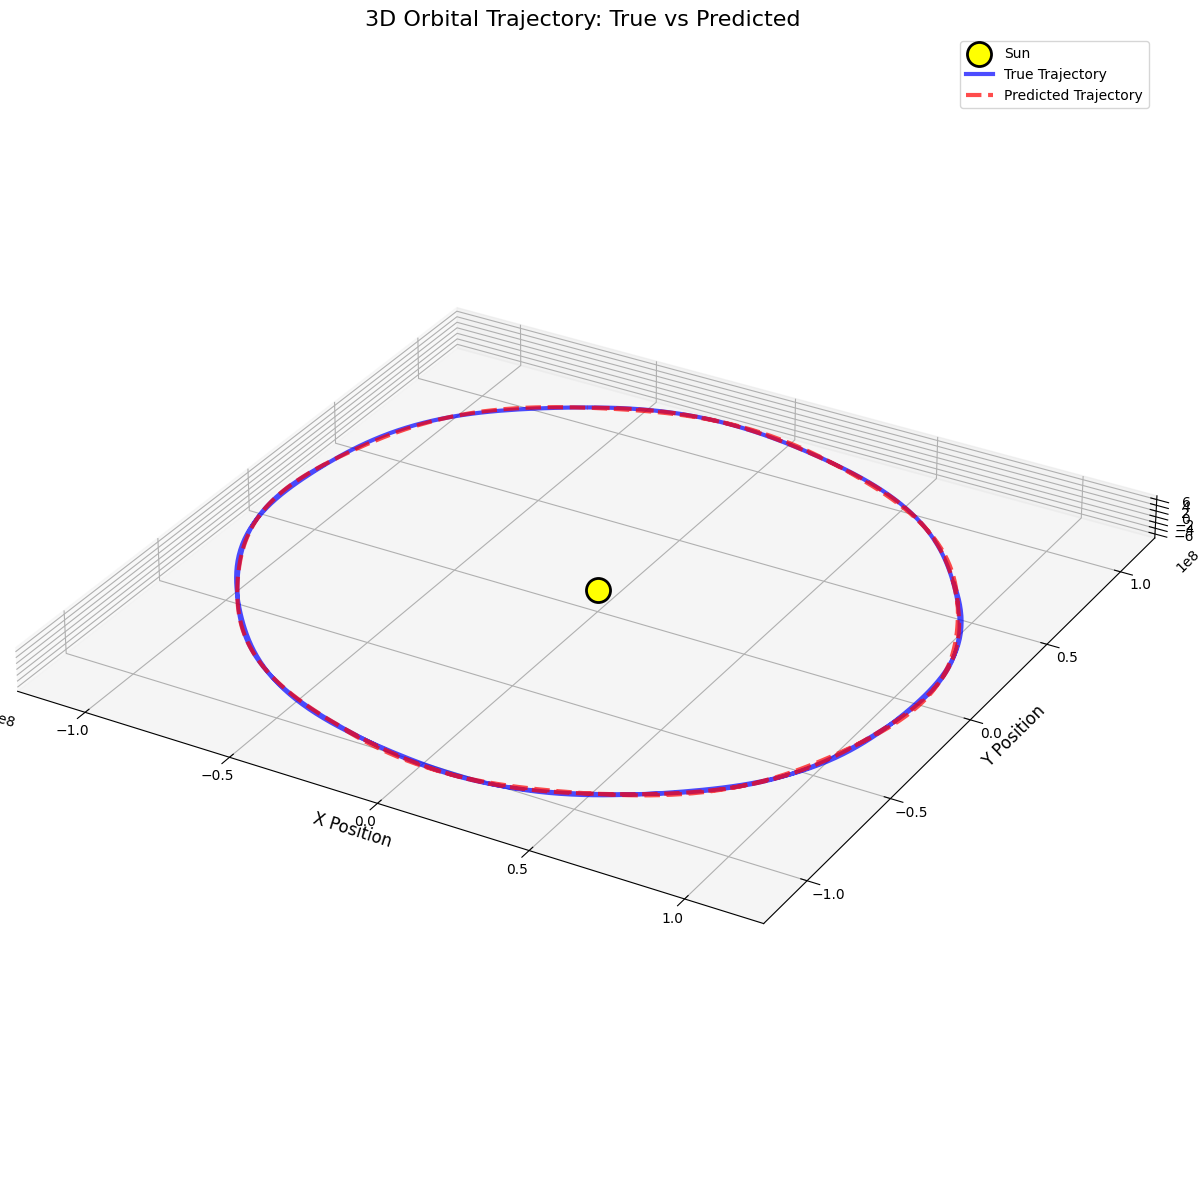

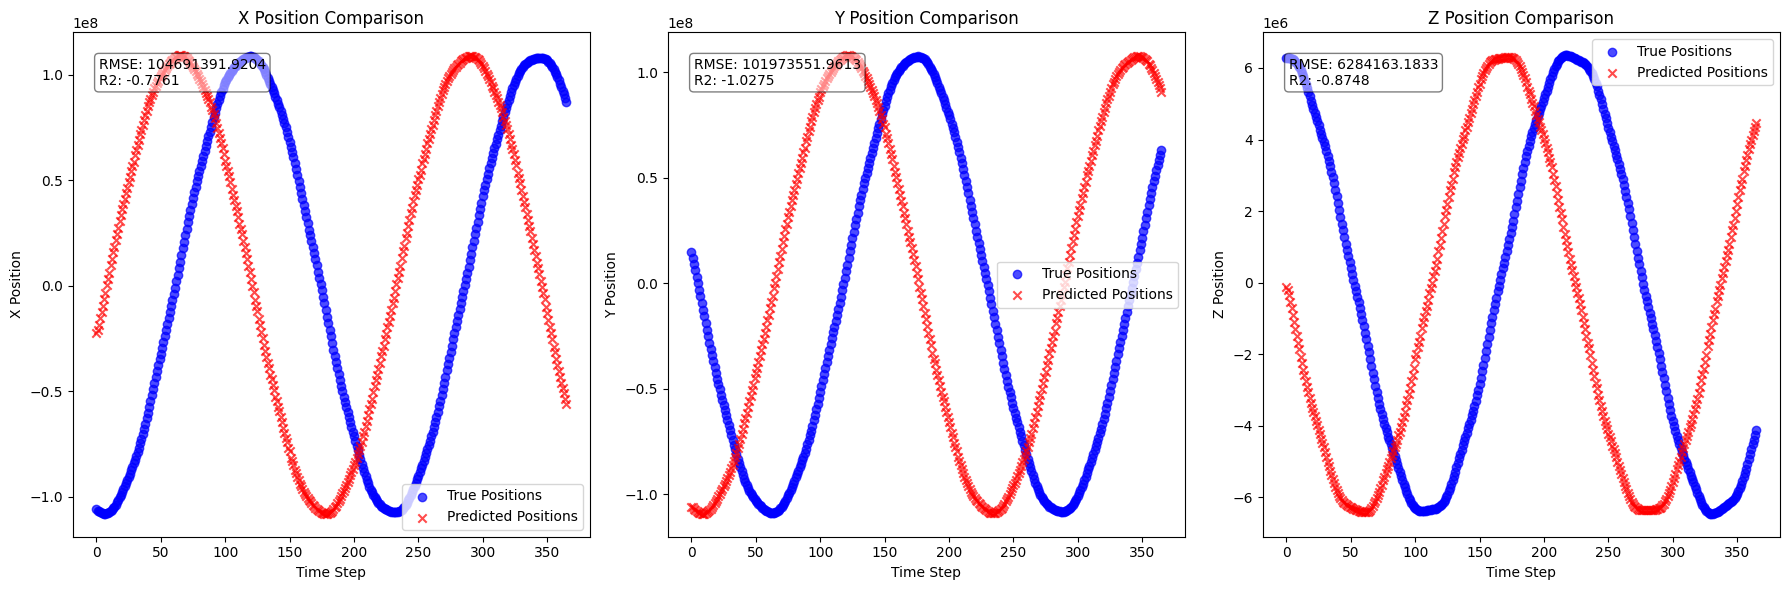

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def predict_orbital_trajectory():
    # Load training data 
    train_data = pd.read_csv('RawData/horizons_results_30_years.csv')
    train_date = pd.to_datetime(train_data['Date'].values)
    train_reference_date = train_date.min()
    train_days_since_reference = (train_date - train_reference_date).days.values
    
    # Load target data
    target_data = pd.read_csv('RawData/horizons_results_target.csv')
    target_date = pd.to_datetime(target_data['Date'].values)
    target_reference_date = target_date.min()
    target_days_since_reference = (target_date - target_reference_date).days.values
    
    # Coordinates to predict
    coordinates = ['x', 'y', 'z']
    
    # Initialize result dictionary
    results = {
        'true_positions': {
            'x': target_data['Position_x'].values,
            'y': target_data['Position_y'].values,
            'z': target_data['Position_z'].values
        },
        'predicted_positions': {},
        'metrics': {}
    }
    
    # Train and predict for each coordinate
    for coord in coordinates:
        # Prepare training features (only days since reference)
        X_train = train_days_since_reference.reshape(-1, 1)
        y_train = train_data[f'Position_{coord}'].values
        
        # Prepare target features
        X_target = target_days_since_reference.reshape(-1, 1)
        y_target = target_data[f'Position_{coord}'].values
        
        # Train Random Forest model
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # Predict positions for target dates
        y_pred = rf_model.predict(X_target)
        
        # Store predicted positions
        results['predicted_positions'][coord] = y_pred
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_target, y_pred))
        r2 = r2_score(y_target, y_pred)
        
        # Store metrics
        results['metrics'][coord] = {
            'RMSE': rmse,
            'R2': r2
        }
    
    return results

def plot_orbital_trajectory(results):
    # Create 3D visualization
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the Sun at the origin
    ax.scatter(0, 0, 0, color='yellow', s=300, label='Sun', edgecolors='black', linewidth=2, zorder=10)
    
    # Plot true trajectory
    true_trajectory = ax.plot3D(
        results['true_positions']['x'], 
        results['true_positions']['y'], 
        results['true_positions']['z'], 
        color='blue', 
        label='True Trajectory',
        linewidth=3,
        alpha=0.7
    )
    
    # Plot predicted trajectory
    predicted_trajectory = ax.plot3D(
        results['predicted_positions']['x'], 
        results['predicted_positions']['y'], 
        results['predicted_positions']['z'], 
        color='red', 
        label='Predicted Trajectory',
        linewidth=3,
        linestyle='--',
        alpha=0.7
    )
    
    ax.set_title('3D Orbital Trajectory: True vs Predicted', fontsize=16)
    ax.set_xlabel('X Position', fontsize=12)
    ax.set_ylabel('Y Position', fontsize=12)
    ax.set_zlabel('Z Position', fontsize=12)
    
    ax.legend()
    
    ax.set_box_aspect((
        np.ptp(results['true_positions']['x']), 
        np.ptp(results['true_positions']['y']), 
        np.ptp(results['true_positions']['z'])
    ))
    
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    plt.tight_layout()
    plt.show()

def plot_positions(results):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Coordinates to plot
    coordinates = ['x', 'y', 'z']
    
    # Colors for true and predicted positions
    true_color = 'blue'
    predicted_color = 'red'
    
    # Plot each coordinate
    for idx, coord in enumerate(coordinates):
        # Select the appropriate subplot
        ax = [ax1, ax2, ax3][idx]
        
        # Retrieve true and predicted positions
        true_pos = results['true_positions'][coord]
        pred_pos = results['predicted_positions'][coord]
        
        # Create scatter plot
        ax.scatter(range(len(true_pos)), true_pos, 
                   color=true_color, label='True Positions', alpha=0.7)
        ax.scatter(range(len(pred_pos)), pred_pos, 
                   color=predicted_color, label='Predicted Positions', 
                   marker='x', alpha=0.7)
        
        ax.set_title(f'{coord.upper()} Position Comparison', fontsize=12)
        ax.set_xlabel('Time Step', fontsize=10)
        ax.set_ylabel(f'{coord.upper()} Position', fontsize=10)
        ax.legend()
        
        # Add metric text
        metric_text = (f"RMSE: {results['metrics'][coord]['RMSE']:.4f}\n"
                       f"R2: {results['metrics'][coord]['R2']:.4f}")
        ax.text(0.05, 0.95, metric_text, transform=ax.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

def main():
    # Predict orbital trajectory
    results = predict_orbital_trajectory()
    
    # Print metrics
    print("\nOrbital Position Prediction Metrics:")
    for coord, metrics in results['metrics'].items():
        print(f"\n{coord.upper()} Coordinate:")
        print(f"  RMSE: {metrics['RMSE']:.4f}")
        print(f"  R2: {metrics['R2']:.4f}")
    
    # Plot trajectory
    plot_orbital_trajectory(results)
    
    # Plot positions
    plot_positions(results)

if __name__ == "__main__":
    main()